In [1]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# QUESTION 1: Loading the Data
customer = pd.read_csv('customer_churn.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# def kimera(x):
#     #x = str(x)
#     print(x)
#     if x == 'Yes':
#         return 1
#     elif x == 'No':
#         return 0
#     else:
#         return 'NaN'

In [5]:
customer.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:

customer['Churn'] = customer['Churn'].map({'Yes': 1, 'No': 0})
customer.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [7]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [8]:
# 2.  predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
customer = customer[['tenure','SeniorCitizen','MonthlyCharges','Churn']]
customer.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1


In [9]:
display(customer.shape)

new_cols = []
for col in customer.columns:
    new_cols.append(col.lower())
customer.columns = new_cols
display(customer.columns)

(7043, 4)

Index(['tenure', 'seniorcitizen', 'monthlycharges', 'churn'], dtype='object')

In [10]:
customer['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [11]:
numerical = customer.select_dtypes(include = np.number)
numerical.head()

,tenure,seniorcitizen,monthlycharges,churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1


In [42]:
# categotical = customer.select_dtypes(object)
# categotical.head()

# NO CATEGORICAL DATA

In [13]:
# 3. Extract the target variable.
# OUR TARGET VARIABLE IS THE ONLY COLUMN UNDER CATEGORICAL
y = customer['churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [14]:
# 4. Extract the independent variables and scale them.
X = customer.drop(['churn'], axis = 1)
X.head()

,tenure,seniorcitizen,monthlycharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


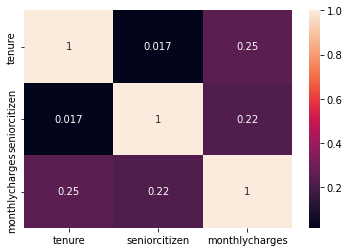

In [15]:
# CHECK FOR COLINEARITY
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [16]:
# TENURE AND SENIOR CITIZEN HAVE A VERY LOW CORRELATION.
# WILL TEST MODEL AFTER DROPPING ONE OF THEM AND CHECK THE DIFFERENCE

In [17]:
# DROP TENURE COLUMN
# Dropping the tenure column made the model worse

In [18]:
# I DO THE TRAIN TEST SPLIT BEFORE SCALING

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2

In [19]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

# TRANSFORM THE TEST DATA AS WELL
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,seniorcitizen,monthlycharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [20]:
# RESET INDEX OF OUR TARGET VARIABLE
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [21]:
# CHECKING R/SHIP BETWEEN y AND X COLUMNS
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [22]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

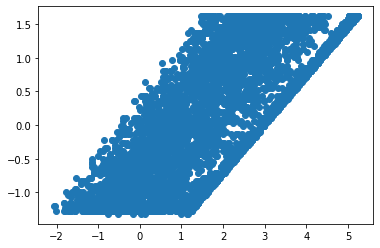

In [23]:
plt.scatter(logits,X_train_scaled['tenure'])

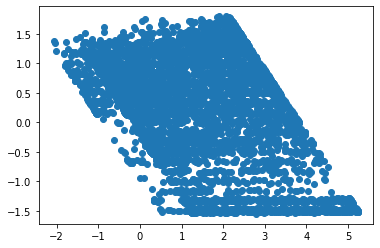

In [24]:
plt.scatter(logits,X_train_scaled['monthlycharges'])

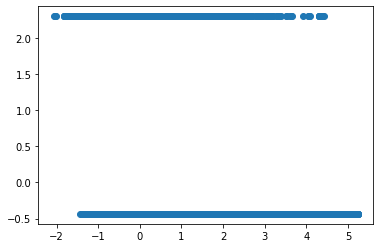

In [43]:
plt.scatter(logits,X_train_scaled['seniorcitizen'])

In [26]:
# THE ABOVE RELATIONSHIP IS NOT LINEAR
# LOOKS LIKE A SQUIGLY LINE. WHY?????

0    5174
1    1869
Name: churn, dtype: int64

<AxesSubplot:>

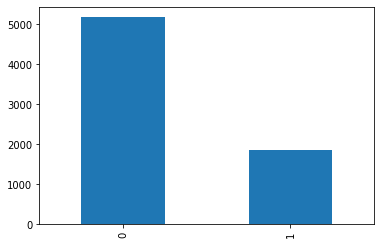

In [27]:
# 5. Build the logistic regression model. 

y_count = y.value_counts()
display(y_count)
y_count.plot(kind = 'bar')

In [28]:
# CONVERT YES => 1 AND NO => 0
# y.map(dict('Yes' == 1, 'No' == 0))
# y_count = y.value_counts()
# display(y_count)
# y_count.plot(kind = 'bar')

In [29]:
# Build and Evaluate the model.
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [30]:
# RELATIVELY GOOD MODEL

In [31]:
# CCURACY CHECKS

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)
#prec = precision_score(y_test,pred)
print("precision: ",round(precision_score(y_test,pred),2))
print("recall: ",round(recall_score(y_test,pred),2))
print("f1: ",round(f1_score(y_test,pred),2))


precision:  0.61
recall:  0.46
f1:  0.52


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]], dtype=int64)

In [33]:
# 7. Even a simple model will give us more than 70% accuracy. Why?
# Because alot of people rarely cancel their internet subscriptions

In [34]:
# 8. Improving the model with SMOTE
from imblearn.over_sampling import SMOTE

In [35]:
X_train.shape

(5282, 3)

In [36]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100,k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [37]:
X_train_SMOTE.shape

(7752, 3)

In [38]:
# yet another small improvement, but bear in mind that we saved 12 hypothetical people with
# these "small improvements"
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",round(precision_score(y_test,pred),2))
print("recall: ",round(recall_score(y_test,pred),2))
print("f1: ",round(f1_score(y_test,pred),2))

precision:  0.48
recall:  0.72
f1:  0.57


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]], dtype=int64)

In [40]:
# SMOTE IMPROVES THE MODEL 
# HOWEVER IT DOES NOT CHANGE THE ACCURACY VALUES